<a href="https://colab.research.google.com/github/MHHamdan/LLM_Reasoning/blob/main/ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning Basics
Reinforcement Learning (RL) is a machine learning technique where an agent learns by interacting with an environment to maximize cumulative rewards.

## In this notebook, we will:

Understand RL concepts (Agent, Environment, Rewards, Actions).
Implement a simple grid-based environment.
Use Q-learning, a fundamental RL algorithm.
Train an agent and visualize its learning progress.


## Step 1: Import Necessary Libraries

### We need to import some essential Python libraries:

- numpy: For handling numerical operations.
- matplotlib.pyplot: To visualize training progress.
- random: To help with action selection.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


## Step 2: Define the Environment
In reinforcement learning, an `environment` is where the agent operates. Here, we define a simple grid-based environment where:

- The agent starts at the top-left corner (0, 0).
- The goal is at the bottom-right corner (size-1, size-1).
- The agent receives a reward of +1 for reaching the goal and -0.1 for each other step.

In [2]:
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.state = (0, 0)  # Starting position
        self.goal = (size-1, size-1)  # Goal position

    def reset(self):
        """Reset the environment to the initial state."""
        self.state = (0, 0)
        return self.state

    def step(self, action):
        """Apply an action and return the new state, reward, and done flag."""
        x, y = self.state
        if action == 0:  # Move up
            x = max(x - 1, 0)
        elif action == 1:  # Move down
            x = min(x + 1, self.size - 1)
        elif action == 2:  # Move left
            y = max(y - 1, 0)
        elif action == 3:  # Move right
            y = min(y + 1, self.size - 1)

        self.state = (x, y)
        reward = 1 if self.state == self.goal else -0.1
        done = self.state == self.goal
        return self.state, reward, done


In [3]:
env = GridWorld();
print(env.reset())

(0, 0)


## Step 3: Define the Q-learning Agent
A Q-learning agent learns by updating a Q-table, which stores the expected rewards for each state-action pair.

Exploration vs. Exploitation:
- The agent sometimes explores random actions (epsilon chance).
- Otherwise, it exploits the best-known action from the Q-table.


Updates Q-values using the Bellman equation:

Q
(
s
,
a
)
←
Q
(
s
,
a
)
+
α
×
(
r
+
γ
max
⁡
a
Q
(
s
′
,
a
)
−
Q
(
s
,
a
)
)
Q(s,a)←Q(s,a)+α×(r+γ
a
max
​
 Q(s
′
 ,a)−Q(s,a))




Meaning: New Q-value is a mix of the old value and the newly observed reward.


In [6]:
class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.q_table = np.zeros((env.size, env.size, 4))  # Q-table for each state (x, y) and 4 actions
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate

    def choose_action(self, state):
        """Selects an action using epsilon-greedy policy."""
        if np.random.rand() < self.epsilon:
            return np.random.choice(4)  # Explore (random action)
        else:
            x, y = state
            return np.argmax(self.q_table[x, y])  # Exploit (best known action)

    def learn(self, state, action, reward, next_state):
        """Updates Q-table using the Bellman equation."""
        x, y = state
        nx, ny = next_state
        best_next_action = np.max(self.q_table[nx, ny])  # Best
        self.q_table[x, y, action] += self.alpha * (reward + self.gamma * best_next_action - self.q_table[x, y, action])

In [7]:
env = GridWorld()
agent = QLearningAgent(env)
print(agent.q_table)


[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


## Step 4: Train the Agent
Now, we will train the agent by running multiple episodes, allowing it to:

- Start at (0,0)
- Explore the environment, choosing actions based on the Q-learning policy
- Update the Q-table over time
- Learn the optimal path to reach the goal

In [8]:
def train_agent(episodes=500):
    env = GridWorld()
    agent = QLearningAgent(env)
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.learn(state, action, reward, next_state)
            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return agent, rewards


In [9]:
def train_agent(episodes=500):
    env = GridWorld()
    agent = QLearningAgent(env)
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.learn(state, action, reward, next_state)
            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return agent, rewards


In [10]:
trained_agent, rewards = train_agent()
print(trained_agent.q_table)


[[[-0.22643495 -0.15913636 -0.19028462 -0.0434062 ]
  [-0.15760392  0.062882   -0.18132159 -0.13950654]
  [-0.16548624  0.10510514 -0.14885574 -0.16392764]
  [-0.10598356  0.1353936  -0.11044293 -0.10814761]
  [-0.07725531 -0.05797122 -0.07159693 -0.07660558]]

 [[-0.21522687 -0.23010302 -0.22992971  0.0365297 ]
  [-0.10035595 -0.0454684  -0.15374562  0.18098   ]
  [-0.10859705  0.20121433  0.00144403  0.3122    ]
  [-0.06780348  0.458       0.1218616   0.3113181 ]
  [-0.04842451  0.59935922 -0.0539908  -0.0393238 ]]

 [[-0.16946959 -0.16838906 -0.17313621 -0.16557766]
  [-0.12968015 -0.11736393 -0.14859607  0.198883  ]
  [-0.06719534 -0.06270111 -0.07701658  0.45402924]
  [ 0.22701467  0.40093985  0.18548115  0.62      ]
  [ 0.23254441  0.8         0.3474138   0.52407156]]

 [[-0.13107799 -0.10775661 -0.11361513 -0.10804963]
  [-0.07361856  0.00949397 -0.0831377  -0.07221376]
  [-0.04333515  0.15785252 -0.05379677 -0.03513619]
  [-0.0199      0.75665752 -0.02233729 -0.01      ]
  [ 0.

## Step 5: Plot Training Progress
We will plot the total rewards per episode to observe how the agent is learning.

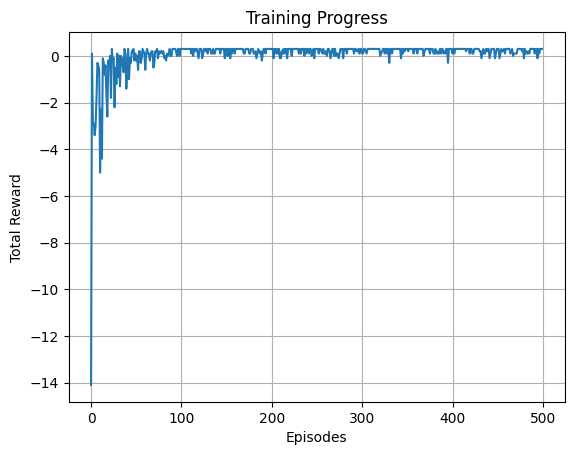

In [11]:
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Training Progress')
plt.grid(True)
plt.show()


## Step 6: Create an Interactive Training Plot
- Instead of plotting after training, we will update the plot live as the agent learns.
- Matplotlib’s FuncAnimation will refresh the plot every few episodes.

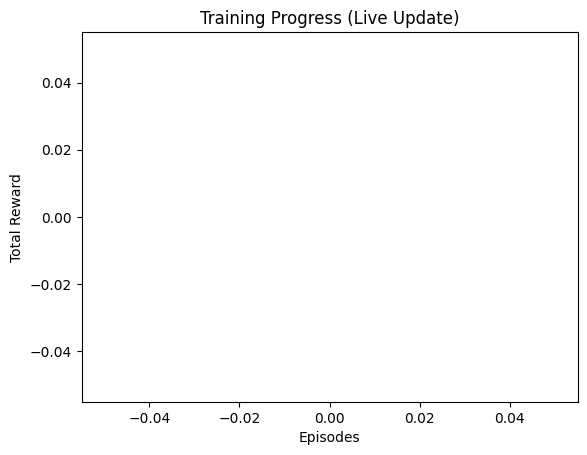

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize the figure and axis
fig, ax = plt.subplots()
ax.set_xlabel("Episodes")
ax.set_ylabel("Total Reward")
ax.set_title("Training Progress (Live Update)")
line, = ax.plot([], [], lw=2)

# Update function for animation
def update(frame):
    if frame >= len(rewards):
        return line,
    line.set_data(range(frame), rewards[:frame])
    ax.relim()
    ax.autoscale_view()
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(rewards), interval=10, blit=False)

plt.show()


## Step 7: Test the Performance of the Trained Agent
1. Run the agent in the environment without learning (i.e., without exploration, just exploitation).
2. Measure how many steps it takes to reach the goal.
3. Observe if it follows an optimal path.


In [15]:
def test_agent(agent, env, episodes=10):
    """Tests the trained agent and prints its performance."""
    success_count = 0
    total_steps = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        steps = 0

        while not done:
            action = np.argmax(agent.q_table[state[0], state[1]])  # Always pick the best action
            next_state, reward, done = env.step(action)
            state = next_state
            steps += 1

        total_steps.append(steps)
        if state == env.goal:
            success_count += 1  # Check if the agent reached the goal

    avg_steps = np.mean(total_steps)
    success_rate = (success_count / episodes) * 100

    print(f"Success Rate: {success_rate:.2f}%")
    print(f"Average Steps to Goal: {avg_steps:.2f}")

    return success_rate, avg_steps


In [16]:
success_rate, avg_steps = test_agent(trained_agent, env)


Success Rate: 100.00%
Average Steps to Goal: 8.00


# Step 8: Visualizing the Agent’s Movements
This will show how the agent moves from (0,0) to the goal step by step.

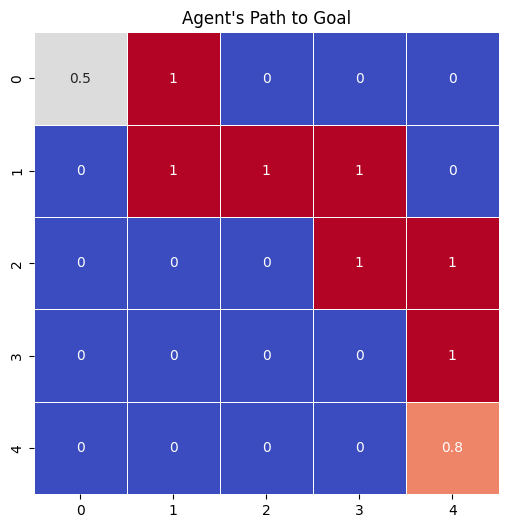

In [17]:
import time
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_agent(agent, env):
    """Visualizes the agent's movement from start to goal."""
    state = env.reset()
    path = [state]  # Store visited states

    done = False
    while not done:
        action = np.argmax(agent.q_table[state[0], state[1]])  # Best action
        state, _, done = env.step(action)
        path.append(state)

    # Create a grid visualization
    grid = np.zeros((env.size, env.size))
    for (x, y) in path:
        grid[x, y] = 1  # Mark the agent's path

    # Mark start and goal positions
    grid[0, 0] = 0.5  # Start (gray)
    grid[env.goal[0], env.goal[1]] = 0.8  # Goal (yellow)

    # Plot the grid
    plt.figure(figsize=(6, 6))
    sns.heatmap(grid, annot=True, cmap="coolwarm", linewidths=0.5, cbar=False)
    plt.title("Agent's Path to Goal")
    plt.show()

# Run visualization
visualize_agent(trained_agent, env)
